In [1]:
import os, shutil
import pandas as pd
import os
import re
import string
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
import statistics
from scipy.stats.mstats import gmean
import math
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from geopy.distance import geodesic
import os
import random
import matplotlib.pyplot as plt
cwd = os.getcwd()

In [2]:
emissions = pd.read_csv(cwd+"/emissions_smart.csv")
emissions = emissions.rename(
        columns={"Unnamed: 0" : "Year",
                 "Unnamed: 1" : "Stream",
                 "Unnamed: 2" : "Source"}
    )
emissions = emissions.drop(
    columns=["Stream"]
)
emissions[:30]

,Year,Source,Emissions
0,2020,coal,6.935824e+09
1,2020,gas,4.534636e+09
2,2020,hydro,9.045126e+09
3,2020,nuclear,2.609406e+05
4,2020,solar,5.400435e+07
5,2020,wind,3.354446e+06
6,2020,coal,2.536004e+12
7,2020,gas,2.300964e+10
8,2020,hydro,0.000000e+00
9,2020,nuclear,1.105728e+08


In [3]:
combined = pd.pivot_table(emissions, index='Year', columns=['Source'], aggfunc=sum, fill_value=0)
combined = combined["Emissions"]

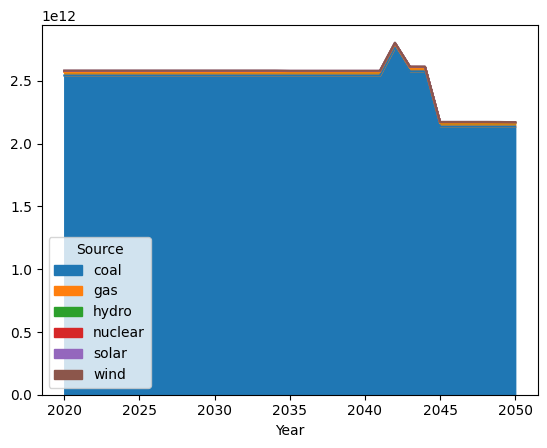

In [4]:
combined.plot.area()
plt.show() # both oper_need and front_need summed

In [5]:
front_need = pd.read_csv(cwd+"/emissions_smart.csv")
front_need = front_need.rename(
        columns={"Unnamed: 0" : "Year",
                 "Unnamed: 1" : "Stream",
                 "Unnamed: 2" : "Source"}
    )
front_need = front_need.loc[front_need['Stream'] == 'front_need']
front_need = front_need.drop(
    columns={"Stream"}
)
front_need

,Year,Source,Emissions
0,2020,coal,6.935824e+09
1,2020,gas,4.534636e+09
2,2020,hydro,9.045126e+09
3,2020,nuclear,2.609406e+05
4,2020,solar,5.400435e+07
...,...,...,...
361,2050,gas,4.534636e+09
362,2050,hydro,7.804177e+09
363,2050,nuclear,2.630659e+05
364,2050,solar,0.000000e+00


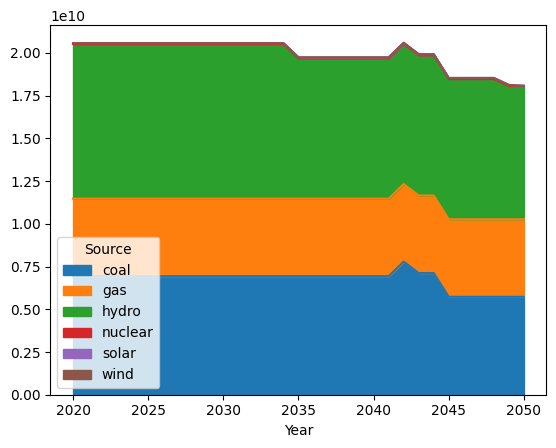

In [6]:
front_chart = pd.pivot_table(front_need, index='Year', columns=['Source'], aggfunc=sum, fill_value=0)
front_chart = front_chart["Emissions"]
front_chart.plot.area()
plt.show() # front_need only

In [7]:
oper_need = pd.read_csv(cwd+"/emissions_smart.csv")
oper_need = oper_need.rename(
        columns={"Unnamed: 0" : "Year",
                 "Unnamed: 1" : "Stream",
                 "Unnamed: 2" : "Source"}
    )
oper_need = oper_need.loc[oper_need['Stream'] == 'oper_need']
oper_need= oper_need.drop(
    columns={"Stream"}
)
oper_need

,Year,Source,Emissions
6,2020,coal,2.536004e+12
7,2020,gas,2.300964e+10
8,2020,hydro,0.000000e+00
9,2020,nuclear,1.105728e+08
10,2020,solar,1.271515e+09
...,...,...,...
367,2050,gas,2.300964e+10
368,2050,hydro,0.000000e+00
369,2050,nuclear,1.104550e+08
370,2050,solar,0.000000e+00


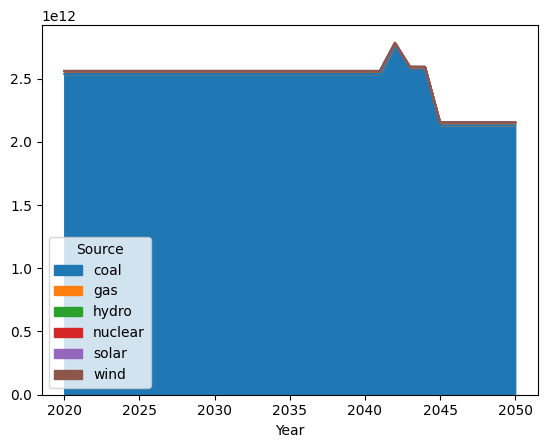

In [8]:
oper_chart = pd.pivot_table(oper_need, index='Year', columns=['Source'], aggfunc=sum, fill_value=0)
oper_chart = oper_chart["Emissions"]
oper_chart.plot.area()
plt.show() # oper_need only

In [9]:
sources = pd.read_csv(cwd+"/emissions_smart.csv")
sources = sources.rename(
        columns={"Unnamed: 0" : "Year",
                 "Unnamed: 1" : "Stream",
                 "Unnamed: 2" : "Source"}
    )
sources = sources.drop(
    columns=["Year", "Stream"]
)
sources = sources.groupby(["Source"]).sum("Emissions")
sources = sources.reset_index()
sources

,Source,Emissions
0,coal,7.667895e+13
1,gas,8.538724e+11
2,hydro,2.662621e+11
3,nuclear,3.461665e+09
4,solar,3.984351e+10
5,wind,1.244345e+10


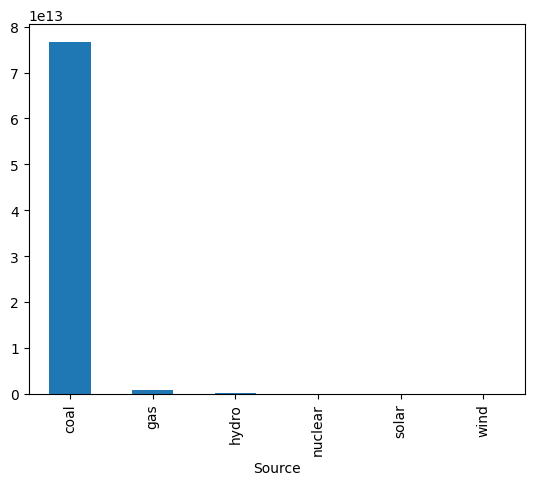

In [10]:
sources.plot(x='Source', y='Emissions', kind='bar', legend=False)
plt.show()